In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import argrelmax, argrelextrema
from scipy.signal import find_peaks
from scipy.fft import fft
import math
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

from onesidedcoupling import OnesidedCoupling

In [7]:
t_step = 0.01
t_last = 100 # 50h -> 1 point represent 1h
t = np.arange(0, 4000, t_step)
keep = int(t_last / t_step)
k_up = np.arange(0,1, 0.01)
k_down = k_up[::-1]
gamma = 0.2
mu = 2
beta = 0.2
alpha = 0.5
T = OnesidedCoupling((1,1,1,1), t, keep, 1, mu, gamma, alpha, beta).period(10)[1]

In [8]:
def compute_amplitude(par, t, keep, k, mu, gamma, alpha, beta):
    amp = OnesidedCoupling(par, t, keep, k, mu, gamma, alpha, beta).find_peaks_max()[1][1]['peak_heights'][-10:]
    # if math.isnan(amp):
    #     return 0
    
    # else:
    return amp

In [9]:
par0 = 1,1,1,1
amplitudes_up = []
amplitudes_down = []

for f in k_up:
    sol = OnesidedCoupling(par0, t, keep, f, mu, gamma, alpha, beta).duffvdpsolver()
    par0 = sol[-1]
    amplitudes_up.append(compute_amplitude(par0, t, keep, f, mu, gamma, alpha, beta))


par0 = sol[-1]

for j in k_down:
    sol = OnesidedCoupling(par0, t, keep, j, mu, gamma, alpha, beta).duffvdpsolver()
    par0 = sol[-1]  
    amplitudes_down.append(compute_amplitude(par0, t, keep, j, mu, gamma, alpha, beta))



In [5]:
amplitudes_down[-10]

array([0.3289809 , 0.32898088, 0.32898085, 0.32898081, 0.32898075,
       0.32898068, 0.3289806 , 0.3289805 , 0.32898039, 0.32898027])

<function matplotlib.pyplot.show(close=None, block=None)>

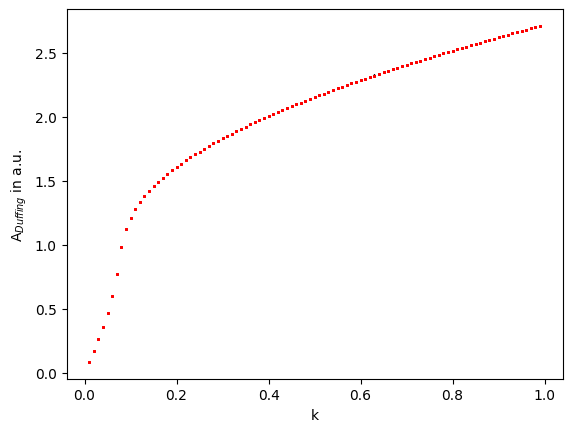

In [10]:
for e,k in enumerate(k_up):
    try:
        plt.plot([k]*10, amplitudes_up[e],'k.', markersize=0.5)
    except:
        None

for j,w in enumerate(k_down):
    try:
        plt.plot([w]*10, amplitudes_down[j],'r.', markersize=1.5)
    except:
        None

plt.xlabel("k")
plt.ylabel("A$_{Duffing}$ in a.u.")
plt.show

In [112]:
t_step = 0.01
t_last = 100 # 50h -> 1 point represent 1h
t = np.arange(0, 4000, t_step)
keep = int(t_last / t_step)
k_up = np.arange(0.05,0.2, 0.001)
k_down = k_up[::-1]
gamma = 0.2
mu = 2
beta = 0.5
alpha = 0.1


In [113]:
par0 = 1,1,1,1
amplitudes_up = []
amplitudes_down = []

for f in k_up:
    sol = OnesidedCoupling(par0, t, keep, f, mu, gamma, alpha, beta).duffvdpsolver()
    par0 = sol[-1]
    amplitudes_up.append(compute_amplitude(par0, t, keep, f, mu, gamma, alpha, beta))


par0 = sol[-1]

for j in k_down:
    sol = OnesidedCoupling(par0, t, keep, j, mu, gamma, alpha, beta).duffvdpsolver()
    par0 = sol[-1]  
    amplitudes_down.append(compute_amplitude(par0, t, keep, j, mu, gamma, alpha, beta))



In [108]:
amplitudes_down

[array([1.42206771, 1.42206768, 1.42206807, 1.42206615, 1.42206556,
        1.42206598, 1.42206544, 1.42206399, 1.42206327, 1.42206314]),
 array([0.1737632 , 0.17376421, 0.17376317, 0.17376418, 0.17376314,
        0.17376414, 0.1737631 , 0.1737641 , 0.17376305, 0.17376405])]

<function matplotlib.pyplot.show(close=None, block=None)>

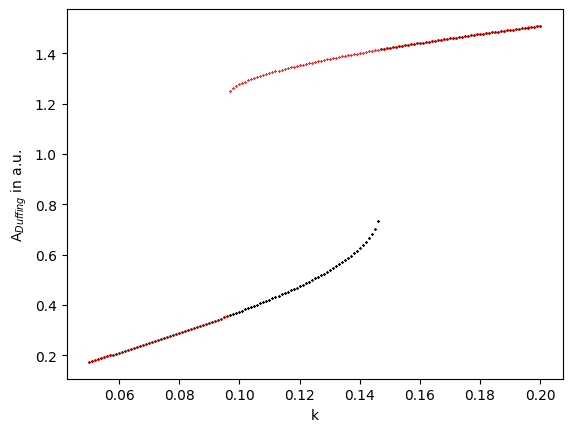

In [116]:
for e,k in enumerate(k_up):
    try:
        plt.plot([k]*10, amplitudes_up[e],'k.', markersize=0.5)
    except:
        None

for j,w in enumerate(k_down):
    try:
        plt.plot([w]*10, amplitudes_down[j],'r.', markersize=0.5, alpha = 0.5)
    except:
        None

plt.xlabel("k")
plt.ylabel("A$_{Duffing}$ in a.u.")
plt.show

In [117]:
t_step = 0.01
t_last = 100 # 50h -> 1 point represent 1h
t = np.arange(0, 4000, t_step)
keep = int(t_last / t_step)
k_up = np.arange(4,10, 0.1)
k_down = k_up[::-1]
gamma = 0.2
mu = 2
beta = 0.5
alpha = 0.1


In [118]:
par0 = 1,1,1,1
amplitudes_up = []
amplitudes_down = []

for f in k_up:
    sol = OnesidedCoupling(par0, t, keep, f, mu, gamma, alpha, beta).duffvdpsolver()
    par0 = sol[-1]
    amplitudes_up.append(compute_amplitude(par0, t, keep, f, mu, gamma, alpha, beta))


par0 = sol[-1]

for j in k_down:
    sol = OnesidedCoupling(par0, t, keep, j, mu, gamma, alpha, beta).duffvdpsolver()
    par0 = sol[-1]  
    amplitudes_down.append(compute_amplitude(par0, t, keep, j, mu, gamma, alpha, beta))



<function matplotlib.pyplot.show(close=None, block=None)>

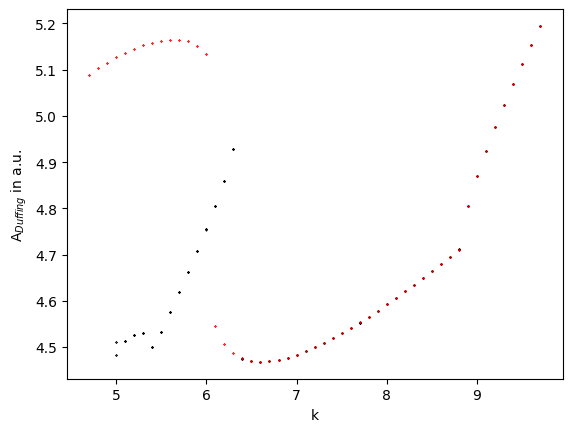

In [119]:
for e,k in enumerate(k_up):
    try:
        plt.plot([k]*10, amplitudes_up[e],'k.', markersize=0.5)
    except:
        None

for j,w in enumerate(k_down):
    try:
        plt.plot([w]*10, amplitudes_down[j],'r.', markersize=0.5, alpha = 0.5)
    except:
        None

plt.xlabel("k")
plt.ylabel("A$_{Duffing}$ in a.u.")
plt.show